In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Change directory
%cd 'drive/My Drive/results/chipseq/'

/content/drive/My Drive/results/chipseq


In [3]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

     - 47.7 MB 8.9 MB/s
  Created wheel for gradient-correction: filename=gradient_correction-0.1-py3-none-any.whl size=10940 sha256=d724899abf0661f3dc413ef04bcc86660d342ddc0046866c2cbe928e1affb0f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-k_g0_0xx/wheels/03/4c/0a/9516d8fa386ed9a21d1aa50e8cc5b1f6d6f576195897b24409
Successfully built gradient-correction


In [4]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [5]:
ls

 Arid3_cnn_deep_exponential_results.pickle
 Arid3_cnn_deep_exponential_results_seq.pickle
 Arid3_cnn_deep_relu_results.pickle
 Arid3_cnn_deep_relu_results_seq.pickle
 Arid3_cnn_shallow_exponential_results.pickle
 Arid3_cnn_shallow_exponential_results_seq.pickle
 Arid3_cnn_shallow_relu_results.pickle
 Arid3_cnn_shallow_relu_results_seq.pickle
 CTCF_cnn_deep_exponential_results.pickle
 CTCF_cnn_deep_exponential_results_seq.pickle
 CTCF_cnn_deep_relu_results.pickle
 CTCF_cnn_deep_relu_results_seq.pickle
 CTCF_cnn_shallow_exponential_results.pickle
 CTCF_cnn_shallow_exponential_results_seq.pickle
 CTCF_cnn_shallow_relu_results.pickle
 CTCF_cnn_shallow_relu_results_seq.pickle
 deep_exp_dispersion_bins_corr.pickle
 deep_exp_dispersion_bins.pickle
 deep_relu_dispersion_bins_corr.pickle
 deep_relu_dispersion_bins.pickle
 FOXK2_cnn_deep_exponential_results.pickle
 FOXK2_cnn_deep_exponential_results_seq.pickle
 FOXK2_cnn_deep_relu_results.pickle
 FOXK2_cnn_deep_relu_results_seq.pickle
 FOXK2_cnn

In [6]:
import pickle

experiments = ['CTCF', 'MAX', 'FOXK2', 'Arid3', 'KLF5', 'GABPA', 'ZNF24', 'PAX8', 'SRF', 'REST']

file_cnn_deep_relu = {}
file_cnn_deep_exp = {}
file_cnn_shallow_relu = {}
file_cnn_shallow_exp = {}

for experiment in experiments: 
    file_cnn_deep_relu[experiment] = open(experiment + "_cnn_deep_relu_results.pickle", "rb")
    file_cnn_deep_exp[experiment] = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
    file_cnn_shallow_relu[experiment] = open(experiment + "_cnn_shallow_relu_results.pickle", "rb")
    file_cnn_shallow_exp[experiment] = open(experiment + "_cnn_shallow_exponential_results.pickle", "rb")

In [7]:
# It may be memory-intensive to load all experiments at once; if this is the case, pick and plot one experiment only, or a few. You may avoid the largest experiment (CTCF).  
#experiment = "REST"

results={}
results['deep_relu'] = {}
results['deep_exp'] = {}
results['shallow_relu'] = {}
results['shallow_exp'] = {}

for experiment in experiments: 
    print('loading ', experiment)
    results['deep_relu'][experiment] = pickle.load(file_cnn_deep_relu[experiment])
    results['deep_exp'][experiment] = pickle.load(file_cnn_deep_exp[experiment])
    results['shallow_relu'][experiment] = pickle.load(file_cnn_shallow_relu[experiment])
    results['shallow_exp'][experiment] = pickle.load(file_cnn_shallow_exp[experiment])

loading  CTCF
loading  MAX
loading  FOXK2
loading  Arid3
loading  KLF5
loading  GABPA
loading  ZNF24
loading  PAX8
loading  SRF
loading  REST


In [20]:
cnn_models=['deep_relu', 'deep_exp', 'shallow_relu', 'shallow_exp']

Angles={}
Angles_ensemble={}
#Scores={}
#Scores_ensemble={}
Dispersion={}
Dispersion_adj={}
Count_angles={}
for cnn_model in cnn_models:
    Angles[cnn_model]={}
    Angles_ensemble[cnn_model]={}
    #Scores[cnn_model]={}
    #Scores_ensembl[cnn_model]={}
    Dispersion[cnn_model]={}
    Dispersion_adj[cnn_model]={}
    Count_angles[cnn_model]={}
    for experiment in experiments: 
        Angles[cnn_model][experiment]=np.array(results[cnn_model][experiment]['angles'])
        Angles_ensemble[cnn_model][experiment]=np.array(results[cnn_model][experiment]['saliency']['ensemble_angles'])
        #Scores[cnn_model][experiment]=np.array(results[cnn_model][experiment]['saliency']['scores'])
        #Scores_ensemble[cnn_model][experiment]=np.array(results[cnn_model][experiment]['saliency']['ensemble_scores'])
        Dispersion[cnn_model][experiment]=np.array(results[cnn_model][experiment]['saliency']['dispersion'])
        Dispersion_adj[cnn_model][experiment]=np.array(results[cnn_model][experiment]['saliency']['adj_dispersion'])
        Count_angles[cnn_model][experiment]={}
        Count_angles[cnn_model][experiment]['30']=np.array(results[cnn_model][experiment]['count_angles']['30'])
        Count_angles[cnn_model][experiment]['45']=np.array(results[cnn_model][experiment]['count_angles']['45'])
        Count_angles[cnn_model][experiment]['60']=np.array(results[cnn_model][experiment]['count_angles']['60'])


# ANGLE STATISTICS

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np 

# cnn-deep-exp

In [13]:
cnn_model = 'deep_exp' # Pick from: ['deep_relu', 'deep_exp', 'shallow_relu', 'shallow_exp']

sine={}
sine_ensemble={}
sine_flattened={}
sine_ensemble_flattened={}

for experiment in experiments: 
    sine[experiment] = np.array(Angles[cnn_model][experiment])
    sine_ensemble[experiment] = np.array(Angles_ensemble[cnn_model][experiment])
    sine_flattened[experiment] = np.reshape(sine[experiment],[-1])  
    sine_ensemble_flattened[experiment] = np.reshape(sine_ensemble[experiment],[-1]) 

(array([1.27844067e-05, 4.26146890e-06, 8.52297958e-06, 1.70458756e-05,
        4.26146890e-06, 2.13073445e-05, 2.13073967e-05, 2.13073445e-05,
        4.26146890e-05, 8.52295868e-06, 3.83532201e-05, 5.53992314e-05,
        1.70458756e-05, 2.13073445e-05, 7.67066282e-05, 2.55688134e-05,
        7.24449712e-05, 6.39221901e-05, 8.94908468e-05, 9.80140249e-05,
        1.19321129e-04, 2.04550507e-04, 2.00289529e-04, 2.13073445e-04,
        2.42904025e-04, 2.47165499e-04, 3.79271197e-04, 4.38931296e-04,
        5.88083428e-04, 6.98881755e-04, 9.75877573e-04, 1.16338101e-03,
        1.35941024e-03, 1.91766335e-03, 2.42903876e-03, 3.12366053e-03,
        3.79697111e-03, 5.31831970e-03, 7.36808424e-03, 9.98889533e-03,
        1.35727909e-02, 1.82859798e-02, 2.37662302e-02, 3.11513686e-02,
        3.81018284e-02, 4.44556844e-02, 4.87171609e-02, 5.05027143e-02,
        4.97654795e-02, 4.46687580e-02, 4.06459401e-02, 3.42324006e-02,
        2.94723550e-02, 2.42648188e-02, 1.90317434e-02, 1.539670

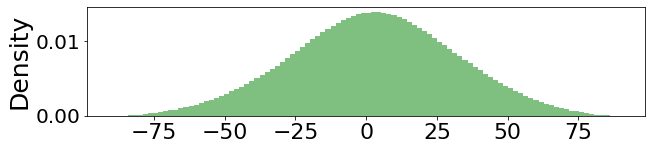

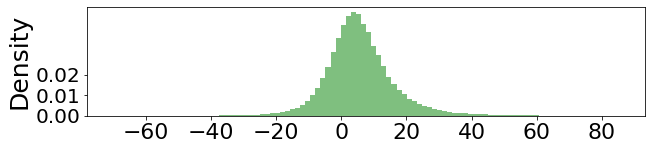

In [ ]:
'''#Plot one experiment angle distribution
experiment='PAX8' #Select individual experiment here

plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
plt.xticks(fontsize=22)
#plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)   #Turn off x ticks
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
plt.hist(sine_flattened[experiment], 100, density=True, alpha=0.5, color='g')

#second distribution 
plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
plt.xticks(fontsize=22)
#plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)    #Turn off x ticks
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
plt.hist(sine_ensemble_flattened[experiment], 100, density=True, alpha=0.5, color='g')'''

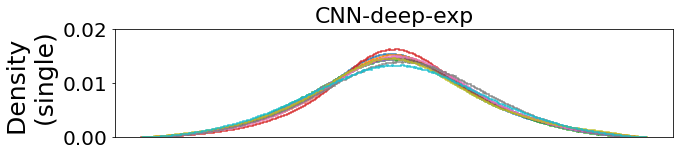

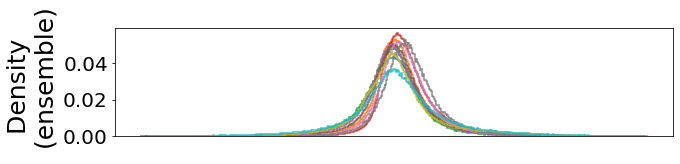

In [14]:
#Plot all experiments angle distribution

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"

plt.figure(figsize=(10,2))
plt.ylabel('Density \n (single)', fontsize=25)  # plt.ylabel('Density \n (single)', fontsize=25)
plt.xticks(fontsize=22)
plt.title(model_, fontsize=22)
plt.ylim((0,0.02))
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)   #Turn off x ticks
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
for experiment in experiments:
    plt.hist(sine_flattened[experiment], 500, density=True, alpha=0.9, histtype='step', linewidth=1.5)

#second distribution 
plt.figure(figsize=(10,2))
plt.ylabel('Density \n (ensemble)', fontsize=25)  # plt.ylabel('Density \n (ensemble)', fontsize=25)
plt.xticks(fontsize=22)
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)    #Turn off x ticks
plt.yticks(ticks=[0.0, 0.02, 0.04, 0.06], fontsize=20)
for experiment in experiments:
    plt.hist(sine_ensemble_flattened[experiment], 500, density=True, alpha=0.9, histtype='step', linewidth=1.5)

In [15]:
print ( np.mean(np.nan_to_num(sine_flattened[experiment])) )
print ( np.std(np.nan_to_num(sine_flattened[experiment])) )
print(sine_flattened[experiment].shape)

0.80032444
29.973635
(12570000,)


# Dispersion

In [ ]:
# Calculate and dispersion bins 
dispersion_bins= geomath.dispersion_bins_func(experiments, Dispersion[cnn_model], sine_flattened) 
dispersion_bins_corrected = geomath.dispersion_bins_func(experiments, Dispersion_adj[cnn_model], sine_flattened) 

In [ ]:
# Save dispersion bins results. (do this only once)
import os
from six.moves import cPickle

filename1 = os.path.join(cnn_model + '_dispersion_bins.pickle')
filename2 = os.path.join(cnn_model + '_dispersion_bins_corr.pickle')

with open(filename1, 'wb') as f:
    cPickle.dump(dispersion_bins, f, protocol=cPickle.HIGHEST_PROTOCOL)
with open(filename2, 'wb') as f:
    cPickle.dump(dispersion_bins_corrected, f, protocol=cPickle.HIGHEST_PROTOCOL)  

In [16]:
sine_bins = np.arange(-90,91,5).astype(float)

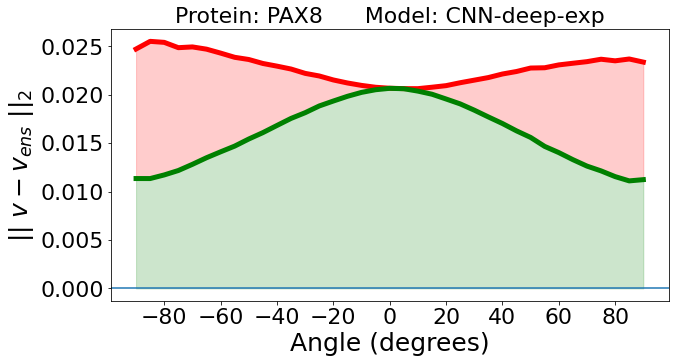

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(sine_bins, dispersion_bins[experiment], '-', color='red',linewidth=5.0)
plt.fill_between(sine_bins, dispersion_bins[experiment], dispersion_bins_corrected[experiment], color="red", alpha=0.2)
plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('|| $v - v_{ens}$ ||$_{2}$', fontsize=25)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=22)
plt.yticks( fontsize=22)
plt.axhline(0)
#plt.axvline(0)

plt.plot(sine_bins, dispersion_bins_corrected[experiment], '-', color='green', linewidth=5.0)
plt.fill_between(sine_bins, dispersion_bins_corrected[experiment], 0, color="green", alpha=0.2)

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"


plt.title("Protein: "+ experiment +"      Model: "+ model_, fontsize=22)

plt.show()

# LOAD ANALYSIS


In [17]:
import os
from six.moves import cPickle

experiments = ['CTCF', 'MAX', 'FOXK2', 'Arid3', 'KLF5', 'GABPA', 'ZNF24', 'PAX8', 'SRF', 'REST']
#cnn_model = 'deep_relu' #Pick from ['deep_relu', 'deep_exp', 'shallow_relu', 'shallow_exp']

filename1 = os.path.join(cnn_model + '_dispersion_bins.pickle')
filename2 = os.path.join(cnn_model + '_dispersion_bins_corr.pickle')


file1 = open(cnn_model + '_dispersion_bins.pickle', "rb")
file2 = open(cnn_model + '_dispersion_bins_corr.pickle', "rb")

dispersion_bins = pickle.load(file1)
dispersion_bins_corrected = pickle.load(file2)


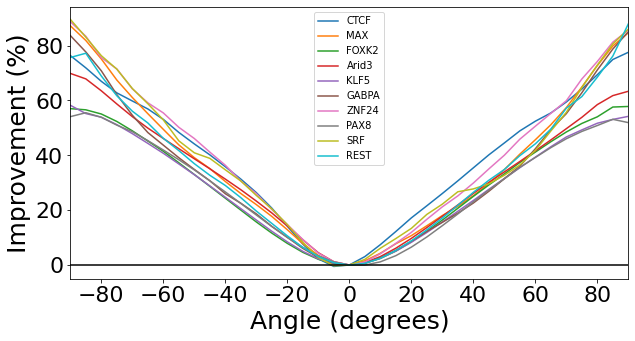

In [18]:
plt.figure(figsize=(10,5))

for experiment in experiments:
    plt.plot(sine_bins, (dispersion_bins[experiment]-dispersion_bins_corrected[experiment])/dispersion_bins[experiment]*100, '-',linewidth=1.5) #color='red'

plt.legend(experiments)

plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Improvement (%)', fontsize=25)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=22)
plt.yticks( fontsize=22)
plt.axhline(0, color='black')
plt.xlim((-90,90))
#plt.axvline(0)

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"


#plt.title("Model: "+ model_, fontsize=22)

plt.show()

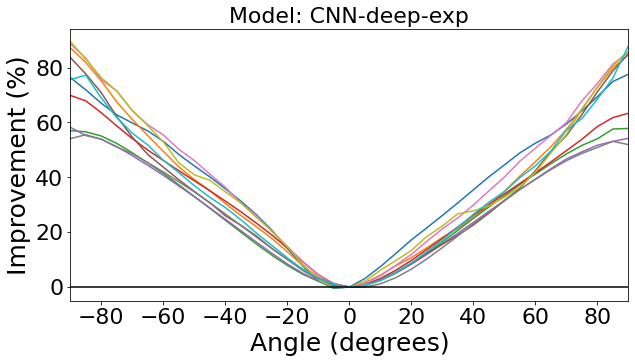

In [ ]:
'''plt.figure(figsize=(10,5))

for experiment in experiments:
    plt.plot(sine_bins, (dispersion_bins[experiment]-dispersion_bins_corrected[experiment])/dispersion_bins[experiment]*100, '-',linewidth=1.5) #color='red'

plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Improvement (%)', fontsize=25)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=22)
plt.yticks( fontsize=22)
plt.axhline(0, color='black')
plt.xlim((-90,90))
#plt.axvline(0)

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"


plt.title("Model: "+ model_, fontsize=22)

plt.show()

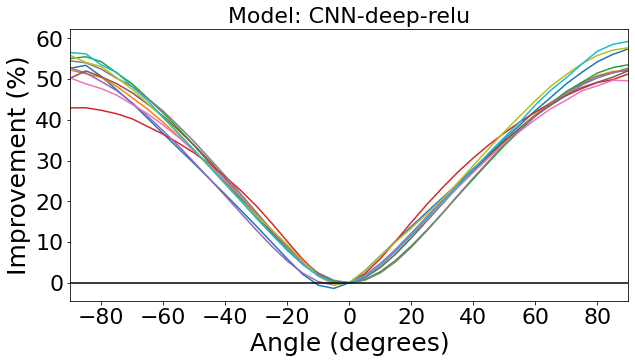

In [ ]:
'''plt.figure(figsize=(10,5))

for experiment in experiments:
    plt.plot(sine_bins, (dispersion_bins[experiment]-dispersion_bins_corrected[experiment])/dispersion_bins[experiment]*100, '-',linewidth=1.5) #color='red'

plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Improvement (%)', fontsize=25)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=22)
plt.yticks( fontsize=22)
plt.axhline(0, color='black')
plt.xlim((-90,90))
#plt.axvline(0)

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"


plt.title("Model: "+ model_, fontsize=22)

plt.show()

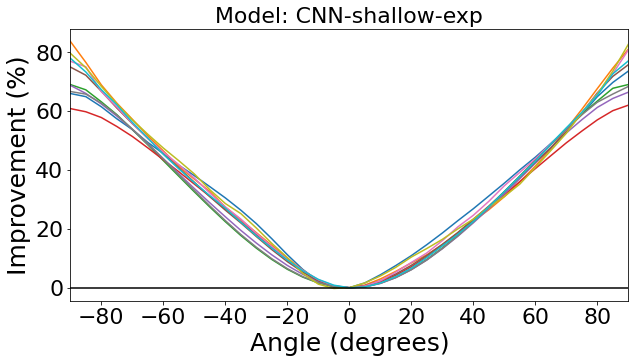

In [ ]:
'''plt.figure(figsize=(10,5))

for experiment in experiments:
    plt.plot(sine_bins, (dispersion_bins[experiment]-dispersion_bins_corrected[experiment])/dispersion_bins[experiment]*100, '-',linewidth=1.5) #color='red'

plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Improvement (%)', fontsize=25)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=22)
plt.yticks( fontsize=22)
plt.axhline(0, color='black')
plt.xlim((-90,90))
#plt.axvline(0)

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"


plt.title("Model: "+ model_, fontsize=22)

plt.show()

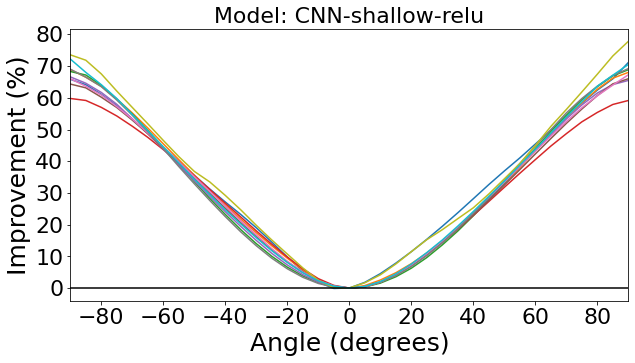

In [ ]:
plt.figure(figsize=(10,5))

for experiment in experiments:
    plt.plot(sine_bins, (dispersion_bins[experiment]-dispersion_bins_corrected[experiment])/dispersion_bins[experiment]*100, '-',linewidth=1.5) #color='red'

plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Improvement (%)', fontsize=25)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=22)
plt.yticks( fontsize=22)
plt.axhline(0, color='black')
plt.xlim((-90,90))
#plt.axvline(0)

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"


plt.title("Model: "+ model_, fontsize=22)

plt.show()

# FURTHER ANGLE STATISTICS

In [85]:
#Synthetic:
syn_30={}
syn_45={}
syn_60={}

syn_30['deep_relu']=29.50692
syn_45['deep_relu']=12.31788
syn_60['deep_relu']=3.70454

syn_30['deep_exp']=38.16202
syn_45['deep_exp']=21.3651
syn_60['deep_exp']=10.69586

syn_30['shallow_relu']=36.62498
syn_45['shallow_relu']=17.34672
syn_60['shallow_relu']=6.00062

syn_30['shallow_exp']=40.59734
syn_45['shallow_exp']=22.54262
syn_60['shallow_exp']=10.5067

In [112]:
cnn_model = 'shallow_relu'
angle_30=[]
angle_45=[]
angle_60=[]
for experiment in experiments:
    angle_30.append(np.average(Count_angles[cnn_model][experiment]['30']))
    angle_45.append(np.average(Count_angles[cnn_model][experiment]['45']))
    angle_60.append(np.average(Count_angles[cnn_model][experiment]['60']))

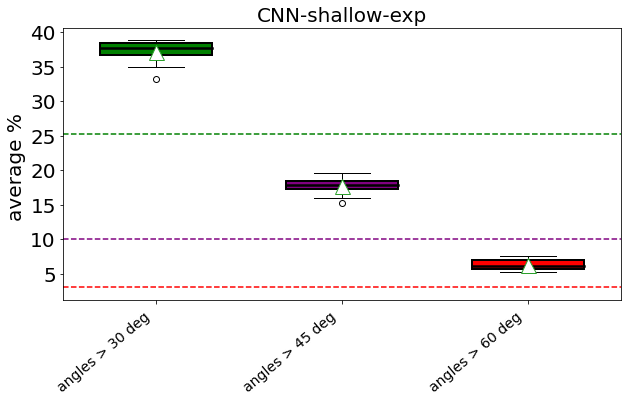

In [95]:
'''##### CNN-shallow-relu

data = np.array ([angle_30, angle_45, angle_60])

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"

figure_title = model_

fig = plt.figure(figsize=(10,5))
flierprops = dict(marker='^', markerfacecolor='white', markersize=15, linestyle='none')  
medianprops = dict(color="black",linewidth=2.5)

box = plt.boxplot(data[0].T, positions=[0], showfliers=True, showmeans=True, meanprops=flierprops, medianprops=medianprops , patch_artist=True,  widths = 0.6);  # medianprops=medianprops  , showmeans=True
for box in box['boxes']:
    box.set(color='black', linewidth=2)
    box.set(facecolor = 'green' )

box = plt.boxplot(data[1].T, positions=[1], showfliers=True, showmeans=True, meanprops=flierprops, medianprops=medianprops , patch_artist=True,  widths = 0.6);  # medianprops=medianprops  , showmeans=True
for box in box['boxes']:
    box.set(color='black', linewidth=2)
    box.set(facecolor = 'purple' )

box = plt.boxplot(data[2].T, positions=[2], showfliers=True, showmeans=True, meanprops=flierprops, medianprops=medianprops , patch_artist=True,  widths = 0.6);  # medianprops=medianprops  , showmeans=True
for box in box['boxes']:
    box.set(color='black', linewidth=2)
    box.set(facecolor = 'red' )


plt.xticks([0, 1, 2], [ 'angles > 30 deg ', 'angles > 45 deg ',  'angles > 60 deg '], rotation=40, fontsize=14, ha='right');  #  ''
ax = plt.gca();
#ax.set_ylim(0,36) 
ax.set_title(figure_title, fontsize=20) 
plt.setp(ax.get_yticklabels(),fontsize=20);
plt.ylabel('average % ', fontsize=20)

plt.axhline(y=25.348, color='green', linestyle='--')
plt.axhline(y=10.127, color='purple', linestyle='--')
plt.axhline(y=3.045, color='red', linestyle='--')

plt.show()

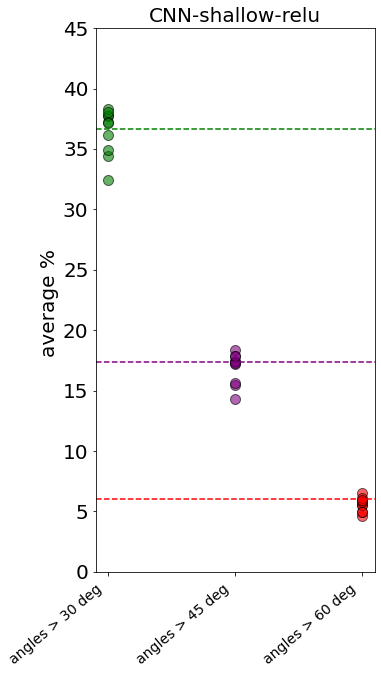

In [114]:
data = np.array ([angle_30, angle_45, angle_60])

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"

figure_title = model_

fig = plt.figure(figsize=(5,10))
flierprops = dict(marker='^', markerfacecolor='white', markersize=15, linestyle='none')  
medianprops = dict(color="black",linewidth=2.5)

plt.scatter([0]*10, data[0], color='green', alpha=0.6, s=100, edgecolor='black')
plt.scatter([1]*10, data[1], color='purple', alpha=0.6, s=100, edgecolor='black')
plt.scatter([2]*10, data[2], color='red', alpha=0.6, s=100, edgecolor='black')
'''box = plt.boxplot(data[1].T, positions=[1], showfliers=True, showmeans=True, meanprops=flierprops, medianprops=medianprops , patch_artist=True,  widths = 0.6);  # medianprops=medianprops  , showmeans=True
for box in box['boxes']:
    box.set(color='black', linewidth=2)
    box.set(facecolor = 'purple' )

box = plt.boxplot(data[2].T, positions=[2], showfliers=True, showmeans=True, meanprops=flierprops, medianprops=medianprops , patch_artist=True,  widths = 0.6);  # medianprops=medianprops  , showmeans=True
for box in box['boxes']:
    box.set(color='black', linewidth=2)
    box.set(facecolor = 'red' )'''


plt.xticks([0, 1, 2], [ 'angles > 30 deg ', 'angles > 45 deg ',  'angles > 60 deg '], rotation=40, fontsize=14, ha='right');  #  ''
ax = plt.gca();
ax.set_ylim(0,45) 
ax.set_title(figure_title, fontsize=20) 
plt.setp(ax.get_yticklabels(),fontsize=20);
plt.ylabel('average % ', fontsize=20)

plt.axhline(y=syn_30[cnn_model], color='green', linestyle='--')
plt.axhline(y=syn_45[cnn_model], color='purple', linestyle='--')
plt.axhline(y=syn_60[cnn_model], color='red', linestyle='--')

plt.show()

In [ ]:
! pip install logomaker

     |████████████████████████████████| 11.8 MB 10.1 MB/s 


In [ ]:
print(Scores['deep_exp'].shape)

(10, 1097, 200, 4)


# ANECDOTAL (last...)

In [ ]:
! pip install logomaker
import logomaker

In [ ]:
saliency_map_raw
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True) 

s=9 #Pick a sequence 42
run_=2

X_50=[]
for i in range (0,len(saliency_map_raw_cummulative)):
    X_50.append(X)   
X_50=np.array(X_50)  

sine_dimensionsadapted=np.expand_dims(sine,3)[run_] * np.sqrt(np.sum(np.square(saliency_map_raw),axis=2,keepdims=True))

from matplotlib.ticker import FormatStrFormatter

import logomaker 

# PLOT for p=0 parameter (default classical saliency)
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=-0.333 parameter 
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CORRECTED[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT ground truth
N, L, A = sine_dimensionsadapted.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    fig = plt.gcf()


# PLOT ground truth
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

In [ ]:
'''!pip install https://github.com/p-koo/tfomics/tarball/master

"# PLOT ground truth\nN, L, A = scores.shape\nfor i in range(s,s+1):   #for i in range(len(X)):\n    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))\n    for a in range(A):\n        for l in range(L):\n            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] \n\n    logomaker.Logo(counts_df, figsize=(25,2))\n    ax = plt.gca()\n    ax.spines['right'].set_visible(False)\n    ax.spines['top'].set_visible(False)\n    #ax.yaxis.set_ticks_position('none')\n    #ax.xaxis.set_ticks_position('none')\n    #plt.xticks([])\n    #plt.yticks([])\n    #plt.ylim((-0.05,0.05)) \n    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))\n    fig = plt.gcf()"

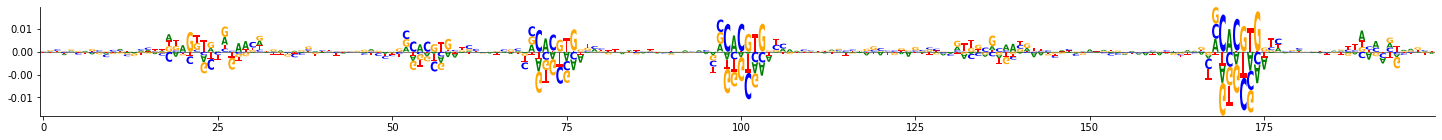

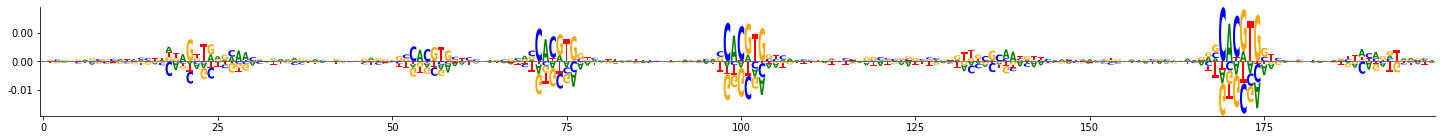

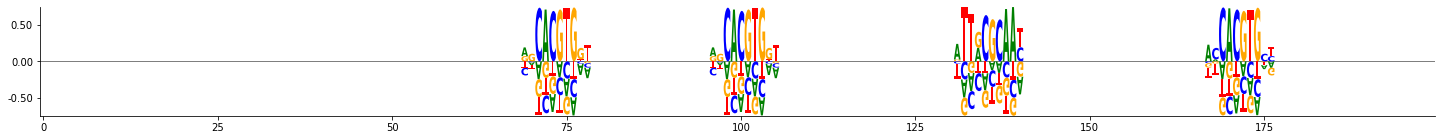

In [ ]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
s=1 #Pick a sequence 42

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = adj_scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = X_model_centered[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

'''# PLOT ground truth
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()'''

In [ ]:
dictionary = {}

dictionary['Ime']= ['Ante', 'Josef', 'Sosana']
dictionary['visina']= [10,11,12]
dictionary['tezina']= [60,70,55]
dictionary['placa']= [600,700,550]

In [ ]:
print(dictionary)

{'Ime': ['Ante', 'Josef', 'Sosana'], 'visina': [10, 11, 12], 'tezina': [60, 70, 55], 'placa': [600, 700, 550]}


In [ ]:
subset = {}
subset['Ime']=dictionary['Ime']
subset['visina']=dictionary['visina']

In [ ]:
print(subset)

{'Ime': ['Ante', 'Josef', 'Sosana'], 'visina': [10, 11, 12]}


In [ ]:
print(dictionary)

{'Ime': ['Ante', 'Josef', 'Sosana'], 'visina': [10, 11, 12], 'tezina': [60, 70, 55], 'placa': [600, 700, 550]}


In [ ]:
delete_key_list=['Ime', 'visina']
for key in delete_key_list: del dictionary[key]

In [ ]:
print(dictionary)

{'tezina': [60, 70, 55], 'placa': [600, 700, 550]}
